In [5]:
import pandas_datareader as pdr

In [4]:
pip install pandas_datareader

     -------------------------------------- 109.5/109.5 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
df = pdr.get_data_tiingo('AAPL', api_key='7ce02ac3d3d6a1059b79be63c92b1fea6c857d2d')

C:\Users\Username\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [12]:
df.to_csv('AAPL.csv')

In [15]:
import pandas as pd

In [16]:
df= pd.read_csv('AAPL.csv')

In [17]:
df2 = df.reset_index()['close']

In [18]:
df2[1228:]

1228    150.72
1229    151.29
1230    148.01
1231    150.18
1232    151.07
1233    148.11
1234    144.22
1235    141.17
1236    148.03
1237    148.31
1238    147.81
1239    146.63
1240    142.91
1241    140.94
1242    142.65
1243    142.16
1244    144.49
1245    145.47
1246    143.21
1247    136.50
1248    134.51
1249    132.37
1250    132.30
1251    135.45
1252    132.23
1253    131.86
1254    130.03
1255    126.04
1256    129.61
1257    129.93
Name: close, dtype: float64

In [20]:
df2.shape

(1258,)

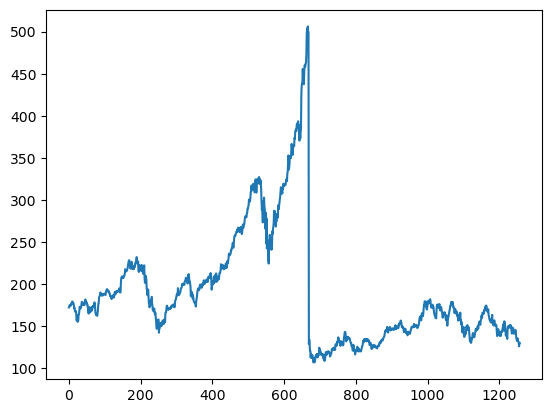

In [21]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [22]:
###LSTM is sensitive to the scale of the data. So we use minmax scaler

In [23]:
import numpy as np

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [25]:
df2.shape

(1258, 1)

In [26]:
#Splitting the data into test and train
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [27]:
training_size,test_size

(817, 441)

In [28]:
train_data

array([[1.63782091e-01],
       [1.65785848e-01],
       [1.70720100e-01],
       [1.69092048e-01],
       [1.69041954e-01],
       [1.68941766e-01],
       [1.71421415e-01],
       [1.75954915e-01],
       [1.73700689e-01],
       [1.80989355e-01],
       [1.81390106e-01],
       [1.79386349e-01],
       [1.75729493e-01],
       [1.75829681e-01],
       [1.68766437e-01],
       [1.60976832e-01],
       [1.61978710e-01],
       [1.53087038e-01],
       [1.50607389e-01],
       [1.51759549e-01],
       [1.52636193e-01],
       [1.34402004e-01],
       [1.24358172e-01],
       [1.40738885e-01],
       [1.31997495e-01],
       [1.21001879e-01],
       [1.24157796e-01],
       [1.39937383e-01],
       [1.44020038e-01],
       [1.51609267e-01],
       [1.65685661e-01],
       [1.64283031e-01],
       [1.62830307e-01],
       [1.60876644e-01],
       [1.64458359e-01],
       [1.71972448e-01],
       [1.80663745e-01],
       [1.79211021e-01],
       [1.78534753e-01],
       [1.70720100e-01],


In [29]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [32]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [33]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [35]:
pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 10.9 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 14.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.5 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 14.1 MB/s eta 0:00:00
     ---------------------------------------- 124.6/124.6 kB ? eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ------------------------------------- 781.3/781.3 kB 12.2 MB/s eta 0:00:00
     ------------------------------------- 177.0/177.0 kB

In [36]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 29s 894ms/step - loss: 0.0403 - val_loss: 7.4786e-04
Epoch 2/100
12/12 [==============================] - 6s 481ms/step - loss: 0.0176 - val_loss: 0.0077
Epoch 3/100
12/12 [==============================] - 5s 438ms/step - loss: 0.0121 - val_loss: 0.0011
Epoch 4/100
12/12 [==============================] - 5s 437ms/step - loss: 0.0094 - val_loss: 6.5393e-04
Epoch 5/100
12/12 [==============================] - 5s 438ms/step - loss: 0.0091 - val_loss: 3.9228e-04
Epoch 6/100
12/12 [==============================] - 5s 439ms/step - loss: 0.0081 - val_loss: 4.3294e-04
Epoch 7/100
12/12 [==============================] - 5s 442ms/step - loss: 0.0075 - val_loss: 3.0739e-04
Epoch 8/100
12/12 [==============================] - 5s 442ms/step - loss: 0.0086 - val_loss: 0.0029
Epoch 9/100
12/12 [==============================] - 5s 448ms/step - loss: 0.0069 - val_loss: 4.1815e-04
Epoch 10/100
12/12 [==============================] - 5s 429ms/ste

In [40]:
import tensorflow as tf

In [41]:
tf.__version__

'2.11.0'

In [42]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 90ms/step


In [43]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [44]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

229.52529265272463

In [45]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

156.11332247597807

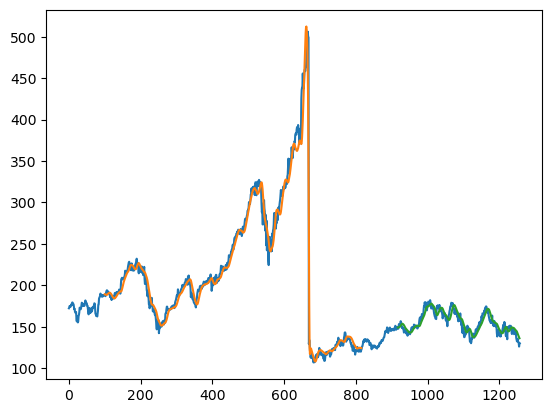

In [48]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [49]:
len(test_data)

441

In [50]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [51]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [52]:
temp_input

[0.15629304946775202,
 0.1544145272385723,
 0.16345648090169063,
 0.16618659987476514,
 0.16578584846587346,
 0.1695929868503444,
 0.1685911083281152,
 0.16200375704445835,
 0.15211020663744512,
 0.15125860989355033,
 0.15201001878522225,
 0.15827175954915462,
 0.142216656230432,
 0.1366061365059486,
 0.13041953663118344,
 0.12618659987476516,
 0.12804007514088916,
 0.1226549780839073,
 0.1194489668127739,
 0.12303068252974325,
 0.1192736380713838,
 0.12656230432060112,
 0.14174076393237317,
 0.1177207263619286,
 0.12140262993112083,
 0.11403882279273636,
 0.10985597996242946,
 0.11932373199749524,
 0.1253850970569818,
 0.1174201628052598,
 0.11496556042579836,
 0.10917971195992482,
 0.11003130870381966,
 0.11251095804633682,
 0.10770194113963677,
 0.08926737633061982,
 0.07854727614276763,
 0.08919223544145266,
 0.09833437695679392,
 0.09908578584846583,
 0.09665623043206006,
 0.08328115216030052,
 0.08410770194113959,
 0.08050093926111451,
 0.07889793362554787,
 0.09054477144646211,


In [53]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.0681053]
101
1 day input [0.15441453 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111
 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666
 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897
 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263
 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556
 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728
 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077
 0.08050094 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834
 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464
 0.09507827 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047
 0.07899812 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128
 0.10379461 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835
 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844
 0.10386976 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317
 0.08846587 0.09430182 0.09675642 0

In [54]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [55]:
import matplotlib.pyplot as plt

In [57]:
len(df2)

1258

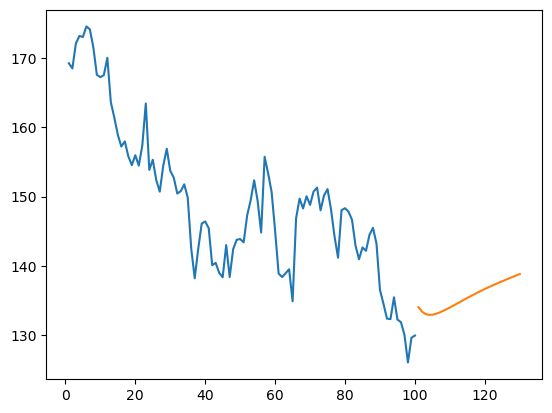

In [58]:
plt.plot(day_new,scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

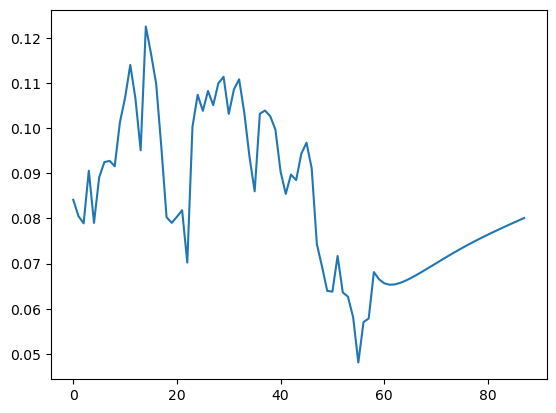

In [59]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [60]:
df3=scaler.inverse_transform(df3).tolist()

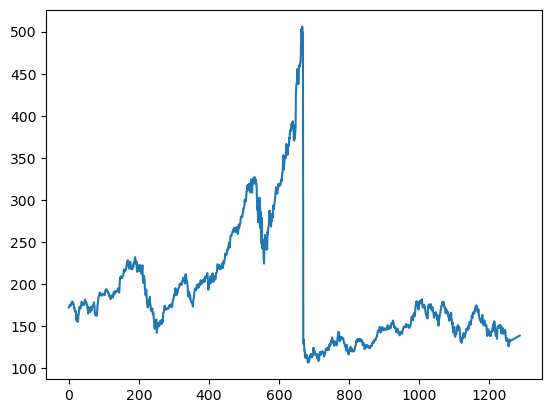

In [61]:
plt.plot(df3)